# Initial Setup and Data Loading

## Task:
Import necessary libraries and load the dataset.

## Reasoning:
Before we can begin our analysis, we need to import the Python libraries that provide the functions and tools we'll be using, such as pandas for data manipulation, numpy for numerical operations, matplotlib for plotting, and pathlib for working with file paths. We also need to load the dataset from the specified Excel file into a pandas DataFrame so we can work with it in our code.

In [1]:
# 0) Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

## **Idea From Fully_Logged_Analysis**:

**Reynolds Number**
**DATASET**: `Nu_Re_Por_Nu=1000.xlsx`

**TARGET**: `"Nu"`

**FEATURES**: `["Re_Log", "Re", "Re_Por", 'Re_1 - Por']` according to SHaP

**MODEL**:
"SVR" =

`{"MAE": 0.006497001409836097,

  "RMSE": 0.00727371986820443,

  "R2": 0.9999977148751082
}`

Best performing with likely good fit.

# Data Loading and Initial Inspection

## Task:
Load the dataset from the Excel file and perform an initial inspection of the data.

## Reasoning:
We load the data from the provided Excel file into a pandas DataFrame. To make the column names easier to work with in Python, we clean them by removing leading/trailing whitespace and replacing spaces with underscores. Displaying the head of the DataFrame gives us a quick look at the first few rows and confirms the data has been loaded correctly with the updated column names.

In [2]:
# 1) Load data
df = pd.read_excel("/content/sample_data/Nu-Re-Por-Nu=1000.xlsx")
df.columns = [str(c).strip().replace(" ", "_") for c in df.columns]
df.head()

,Re,Por,Nu
0,10.000,0.2,0.68776
1,10.991,0.2,0.75567
2,11.982,0.2,0.82351
3,12.973,0.2,0.89130
4,13.964,0.2,0.95901


# Data Overview and Quality Check

## Task:
Get a quick overview of the dataset's structure and check for missing or zero values.

## Reasoning:
Understanding the dimensions and data types of our dataset is crucial before proceeding. We check the shape to see the number of rows and columns, and the data types to ensure they are as expected for numerical analysis. Identifying missing values is important for data cleaning, and checking for zero values can reveal potential issues or characteristics of the data that need to be considered during modeling. Finally, descriptive statistics provide a summary of the central tendency, dispersion, and shape of the dataset's distributions.

In [3]:
# 2) Quick peek
print("Dataset Dimension: ",df.shape)

print("Data Type:\n",df.dtypes)

print("\nMissing values: ")
P = df.columns[df.isna().any()].tolist()
print(f"Columns with missing values: {P}")

print("\nZero values: ")
P = df.columns[(df == 0).any(axis=0)].tolist()
print(f"Columns with zero values: {P}")

print("\nDescriptive statistics: ")
print(df.describe())

Dataset Dimension:  (4000, 3)
Data Type:
 Re     float64
Por    float64
Nu     float64
dtype: object

Missing values: 
Columns with missing values: []

Zero values: 
Columns with zero values: []

Descriptive statistics: 
                Re          Por           Nu
count  4000.000000  4000.000000  4000.000000
mean    505.000010     0.500000    13.253773
std     286.110106     0.223635     4.791381
min      10.000000     0.200000     0.685590
25%     257.502500     0.350000    10.100000
50%     505.000000     0.500000    14.149000
75%     752.497500     0.650000    17.218250
max    1000.000000     0.800000    20.226000


# Visualizing Feature Relationships

## Task:
Explore the relationships between the features and the target variable using scatter plots.

## Reasoning:
Visualizing the relationships between variables is a fundamental step in understanding the data and identifying potential patterns or correlations. Pair plots are useful for displaying scatter plots for all pairs of features, allowing us to quickly see how each variable relates to the others. Coloring the points by the target variable ('Nu') can help reveal how the target changes with different combinations of features.

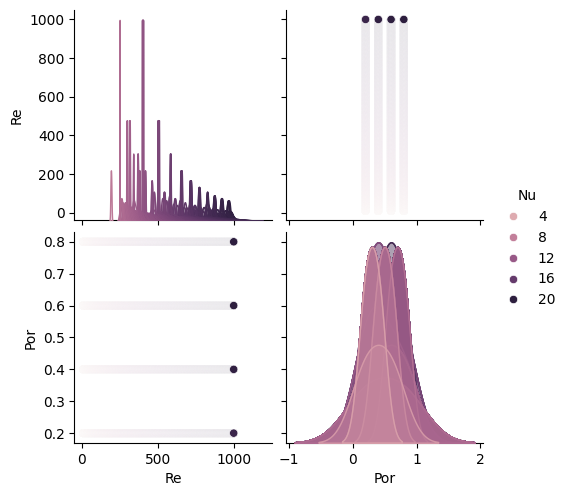

In [4]:
# 3) Visualize relationships
import seaborn as sns

# plot scatter plots to explore relationships between features
sns.pairplot(df, hue="Nu")
plt.show()

# Correlation Analysis

## Task:
Quantify the linear relationships between variables using a correlation matrix and visualize it with a heatmap.

## Reasoning:
While scatter plots provide a visual sense of relationships, a correlation matrix provides a numerical measure of the linear correlation between pairs of variables. A heatmap is a great way to visualize this matrix, making it easy to identify strong positive or negative correlations. This helps us understand which features are most strongly related to the target variable and to each other.

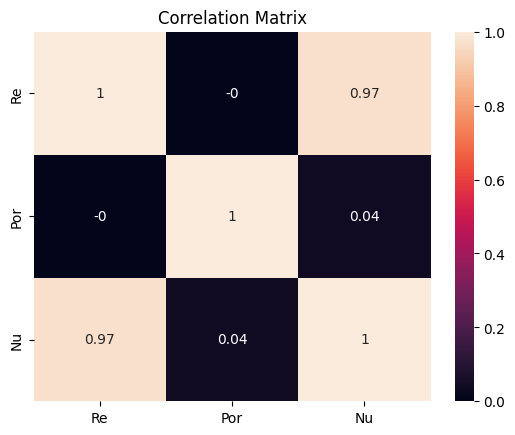

In [5]:
# corelation matrix plot
corr = df.corr().round(4)
sns.heatmap(corr, annot=True).set_title("Correlation Matrix")
plt.show()

# Feature Transformation: Log Scaling

## Task:
Apply a logarithmic transformation to the 'Nu', 'Re', and 'Por' columns.

## Reasoning:
Logarithmic transformations are often applied to skewed data to make it more normally distributed, which can improve the performance of certain machine learning models. It can also help to stabilize the variance of the data. We create new columns with the log-scaled values while keeping the original columns.

Feature Engineering

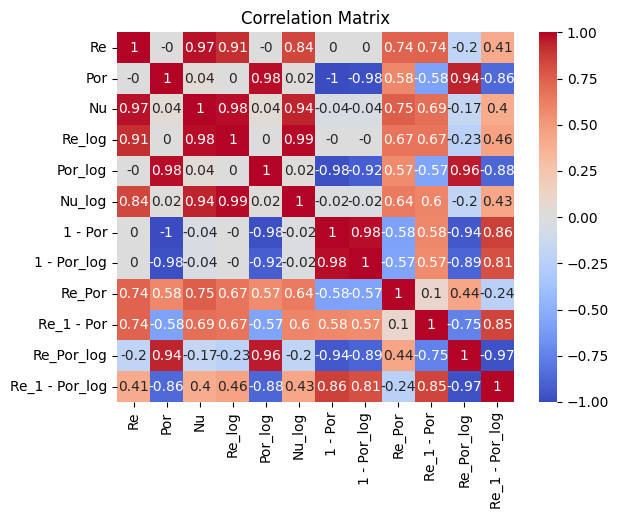

In [6]:
# Feature engineering. Add a few columns to assess importance
'''Interaction terms: Products of existing features (e.g., Re_log * Por_log, Re_log * (1 - Por_log)).
Polynomial features: Higher-order terms of existing features (e.g., Re_log**2, Por_log**2).'''
df["Re_log"] = np.log(df["Re"])
df["Por_log"] = np.log(df["Por"])
df["Nu_log"] = np.log(df["Nu"])

df["1 - Por"] = 1 - df["Por"]
df["1 - Por_log"] = np.log(1 - df["Por"])

df["Re_Por"] = df["Re"] * df["Por"]
df["Re_1 - Por"] = df["Re"] * (1 - df["Por"])
df["Re_Por_log"] = df["Re_log"] * df["Por_log"]
df["Re_1 - Por_log"] = df["Re_log"] * (1 - df["Por_log"])

corr = df.corr().round(2)
sns.heatmap(corr, annot=True, cmap="coolwarm").set_title("Correlation Matrix")
plt.show()

In [7]:
sorted_corr_features = corr['Nu'].sort_values(ascending=False)
print(sorted_corr_features)
# list them as column names
# Use list comprehension to filter features based on absolute correlation with Nu, excluding Nu and Nu_log
feature_names = [
    index
    for index, value in abs(sorted_corr_features).items()
    if value >= 0.4 and index not in ['Nu', 'Nu_log']
]
print("\nFeatures for Nu with absolute correlation >= 0.4 (excluding Nu and Nu_log):")
print(feature_names)

Nu                1.00
Re_log            0.98
Re                0.97
Nu_log            0.94
Re_Por            0.75
Re_1 - Por        0.69
Re_1 - Por_log    0.40
Por               0.04
Por_log           0.04
1 - Por          -0.04
1 - Por_log      -0.04
Re_Por_log       -0.17
Name: Nu, dtype: float64

Features for Nu with absolute correlation >= 0.4 (excluding Nu and Nu_log):
['Re_log', 'Re', 'Re_Por', 'Re_1 - Por', 'Re_1 - Por_log']


In [8]:
df.head()

,Re,Por,Nu,Re_log,Por_log,Nu_log,1 - Por,1 - Por_log,Re_Por,Re_1 - Por,Re_Por_log,Re_1 - Por_log
0,10.000,0.2,0.68776,2.302585,-1.609438,-0.374315,0.8,-0.223144,2.0000,8.0000,-3.705868,6.008453
1,10.991,0.2,0.75567,2.397077,-1.609438,-0.280151,0.8,-0.223144,2.1982,8.7928,-3.857946,6.255023
2,11.982,0.2,0.82351,2.483406,-1.609438,-0.194180,0.8,-0.223144,2.3964,9.5856,-3.996887,6.480293
3,12.973,0.2,0.89130,2.562870,-1.609438,-0.115074,0.8,-0.223144,2.5946,10.3784,-4.124781,6.687651
4,13.964,0.2,0.95901,2.636483,-1.609438,-0.041854,0.8,-0.223144,2.7928,11.1712,-4.243255,6.879738


# Data Splitting for Model Training and Evaluation

## Task:
Split the dataset into training, validation, and test sets.

## Reasoning:
To train and evaluate our machine learning models effectively, we need to split the data into distinct sets. The training set is used to train the model, the validation set is used to tune hyperparameters and evaluate the model during development, and the test set is used for a final, unbiased evaluation of the best-performing model on unseen data. We use `train_test_split` to achieve a 70/15/15 split as planned.

In [9]:
from sklearn.model_selection import train_test_split

FEATURES = feature_names # according to the correlation multivariate analysis
TARGET = "Nu" # based on fully logged analysis


X = df[FEATURES].astype(float)
y = df[TARGET].astype(float)

# Simple 70/15/15 split
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.1765, random_state=42
)

# Confirming Data Split Sizes

## Task:
Print the number of samples in each of the training, validation, and test sets.

## Reasoning:
After splitting the data, it's a good practice to confirm the number of samples in each set to ensure the split was performed correctly according to the desired proportions. This helps in verifying that we have enough data in each set for effective model training and evaluation.

In [10]:
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (2799, 5)
Validation set size: (601, 5)
Test set size: (600, 5)


# Ideal Model: Support Vector Machine


In [13]:
# We will be using SVR
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler # Added import for StandardScaler

# Assuming 'preprocess' was meant to be a preprocessing step,
# using StandardScaler as a placeholder.
preprocess = StandardScaler()

svr = SVR(kernel="rbf")
pipe_svr = Pipeline([("prep", preprocess), ("model", svr)])
pipe_svr.fit(X_train, y_train)
pred_val_svr = pipe_svr.predict(X_val)

print("SVR_val")
print(f"MAE: {mean_absolute_error(y_val, pred_val_svr):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, pred_val_svr)):.4f}")
print(f"R2: {r2_score(y_val, pred_val_svr)}")

SVR_val
MAE: 0.0675
RMSE: 0.0929
R2: 0.9996046117016364


# Fine Tuning Hyperparameters for SVR

## Task:
Optimize the hyperparameters of the Support Vector Regressor (SVR) model using GridSearchCV.

## Reasoning:
To improve the performance of the SVR model, we need to find the best combination of its hyperparameters. GridSearchCV systematically searches through a predefined grid of parameter values, evaluating the model's performance for each combination using cross-validation. This process helps us identify the optimal hyperparameters that minimize the error and improve the model's generalization ability.

In [25]:
# Now we fine tune SVR hyperparameters
from sklearn.model_selection import RandomizedSearchCV

param_svr = {
    "model__C": [1, 5, 10, 20, 50, 100], # Expanded C range
    "model__gamma": ['scale', 'auto', 0.1, 0.01, 0.001], # Refined gamma
    "model__kernel": ["rbf"], # RBF is often best, simplifying search
    'model__epsilon': [0.01, 0.05, 0.1, 0.2] # More epsilon options
}

search_svr = RandomizedSearchCV(
    pipe_svr, param_distributions=param_svr,
    n_iter=20, cv=5, scoring="neg_mean_absolute_error",
    random_state=42, n_jobs=-1, verbose=1
)
search_svr.fit(X_train, y_train)
best_svr = search_svr.best_estimator_
print("Best SVR params:", search_svr.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best SVR params: {'model__kernel': 'rbf', 'model__gamma': 0.1, 'model__epsilon': 0.01, 'model__C': 20}


# Evaluating the Tuned SVR Model

## Task:
Evaluate the performance of the tuned Support Vector Regressor (SVR) model on the validation set.

## Reasoning:
After optimizing the SVR model's hyperparameters through cross-validation, we need to evaluate its performance on the validation set. This allows us to see how well the tuned model generalizes to data it hasn't seen during training and tuning, and to compare its performance with other models we have evaluated on the same validation set.

In [27]:
# Evaluating the tuned SVR on validation set
pred_val_svr_tuned = best_svr.predict(X_val)

mae_svr_tuned = mean_absolute_error(y_val, pred_val_svr_tuned)
rmse_svr_tuned = np.sqrt(mean_squared_error(y_val, pred_val_svr_tuned))
r2_svr_tuned = r2_score(y_val, pred_val_svr_tuned)
r2_svr_tuned = r2_score(y_val, pred_val_svr_tuned)

print("SVR_tuned_val")
print(f"MAE: {mae_svr_tuned:.4f}")
print(f"RMSE: {rmse_svr_tuned:.4f}")
print(f"R2: {r2_svr_tuned}")

SVR_tuned_val
MAE: 0.0060
RMSE: 0.0073
R2: 0.9999975807161557


# Residual Analysis for Tuned SVR (Validation Set)

## Task:
Create a residual plot for the tuned SVR model on the validation set to visually inspect the errors.

## Reasoning:
Similar to the other models, we generate a residual plot for the tuned SVR model on the validation set. This helps us to visually assess the distribution of the errors and identify any patterns or issues that might still exist after tuning, ensuring the model's predictions are randomly distributed around zero.

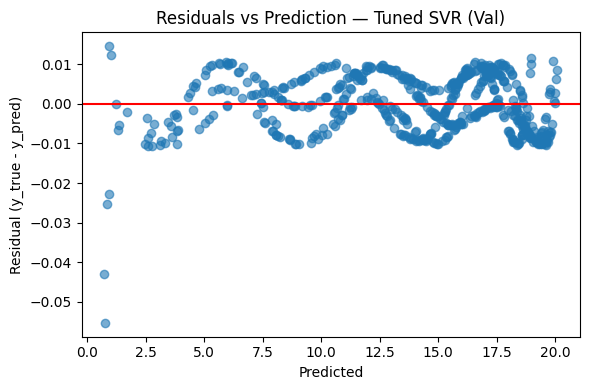

In [28]:
# residual plot for validation set
plt.figure(figsize=(6,4))
residuals_svr_tuned = y_val - pred_val_svr_tuned
plt.scatter(pred_val_svr_tuned, residuals_svr_tuned, alpha=0.6)
plt.axhline(0.0, color="red")
plt.xlabel("Predicted")
plt.ylabel("Residual (y_true - y_pred)")
plt.title("Residuals vs Prediction — Tuned SVR (Val)")
plt.tight_layout()
plt.show()

# Evaluating Tuned SVR on the Test Set

## Task:
Evaluate the best performing SVR model on the test set to get an unbiased estimate of its performance on unseen data.

## Reasoning:
After selecting the best SVR model based on its performance on the validation set, we evaluate it on the independent test set. This provides a final, unbiased measure of how well the model is expected to perform on new, unseen data in a real-world scenario.

In [29]:
# evaluating SVR performance on Test set
pred_test_svr_tuned = best_svr.predict(X_test)

mae_svr_tuned_test = mean_absolute_error(y_test, pred_test_svr_tuned)
rmse_svr_tuned_test = np.sqrt(mean_squared_error(y_test, pred_test_svr_tuned))
r2_svr_tuned_test = r2_score(y_test, pred_test_svr_tuned)

print("SVR_tuned_test")
print(f"MAE: {mae_svr_tuned_test:.4f}")
print(f"RMSE: {rmse_svr_tuned_test:.4f}")
print(f"R2: {r2_svr_tuned_test}")

SVR_tuned_test
MAE: 0.0058
RMSE: 0.0066
R2: 0.9999980945265895


# Residual Analysis for Tuned SVR (Test Set)

## Task:
Create a residual plot for the tuned SVR model on the test set to visually inspect the errors on unseen data.

## Reasoning:
Generating a residual plot for the tuned SVR model on the test set is crucial for confirming its performance on completely unseen data. This plot helps us assess if the model's errors are randomly distributed around zero on new data, which is an indicator of good generalization and lack of systematic biases.

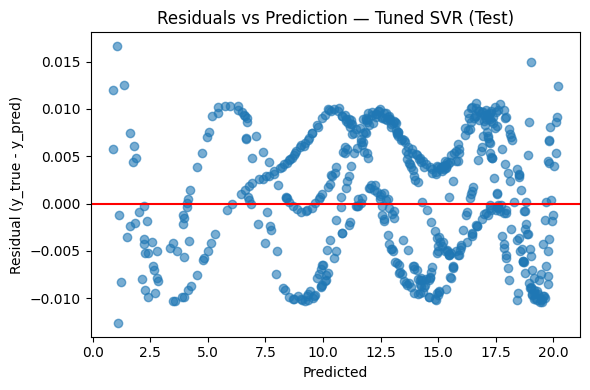

In [31]:
# Residual plot on Test set
plt.figure(figsize=(6,4))
residuals_svr_tuned_test = y_test - pred_test_svr_tuned
plt.scatter(pred_test_svr_tuned, residuals_svr_tuned_test, alpha=0.6)
plt.axhline(0.0, color="red")
plt.xlabel("Predicted")
plt.ylabel("Residual (y_true - y_pred)")
plt.title("Residuals vs Prediction — Tuned SVR (Test)")
plt.tight_layout()
plt.show()

# Comparing Tuned SVR Performance: Train vs. Validation vs. Test

## Task:
Compare the performance metrics (MAE, RMSE, R2) of the tuned SVR model on the validation set and the test set.

## Reasoning:
Comparing the model's performance on the validation and test sets helps us understand how well the model generalizes to completely unseen data. Similar performance indicates that the model is not overfitting to the validation set, while a significant drop in performance on the test set might suggest overfitting or issues with the data split.

In [32]:
print("Tuned SVR Performance Comparison:")
print("Train Set:")
print(f"  MAE: {mean_absolute_error(y_train, best_svr.predict(X_train)):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_train, best_svr.predict(X_train))):.4f}")
print(f"  R2: {r2_score(y_train, best_svr.predict(X_train)):.4f}")

print("\nValidation Set:")
print(f"  MAE: {mae_svr_tuned:.4f}")
print(f"  RMSE: {rmse_svr_tuned:.4f}")
print(f"  R2: {r2_svr_tuned:.4f}")
print("\nTest Set:")
print(f"  MAE: {mae_svr_tuned_test:.4f}")
print(f"  RMSE: {rmse_svr_tuned_test:.4f}")
print(f"  R2: {r2_svr_tuned_test:.4f}")

Tuned SVR Performance Comparison:
Train Set:
  MAE: 0.0057
  RMSE: 0.0067
  R2: 1.0000

Validation Set:
  MAE: 0.0060
  RMSE: 0.0073
  R2: 1.0000

Test Set:
  MAE: 0.0058
  RMSE: 0.0066
  R2: 1.0000


There is no evidence of ***Overfitting*** or ***Underfitting*** which is a good sign.

# Summary of Findings and Best Model

## Task:
Summarize the key findings from the data analysis and model comparison, and identify the best performing model.

## Reasoning:
To conclude our analysis, we summarize the performance of the models, particularly the tuned MLPRegressor and the Gradient Boosting Regressor. We highlight the key metrics on the test set to clearly show which model performed better and why. This provides a concise overview of our work and the main outcome of the model comparison. We also note that the best model is saved and a prediction script is generated for future use.

In [33]:
# Simple permutation importance works for any model
from sklearn.inspection import permutation_importance

best_model = best_svr
r = permutation_importance(best_model, X_val, y_val, n_repeats=10, random_state=42)
imps = pd.Series(r.importances_mean, index=X_val.columns).sort_values(ascending=False)
print("Permutation importance:\n", imps.head(10))

Permutation importance:
 Re_log            0.398538
Re                0.233163
Re_Por            0.147296
Re_1 - Por        0.134624
Re_1 - Por_log    0.021607
dtype: float64


In [37]:
# retrain and test on imps
if feature_names == list(imps.index):
  print("Results are correct and optimum!")
else:
  best_model.fit(X_train[imps.index], y_train)
  pred_test = best_model.predict(X_test[imps.index])

  print("Test set performance on important features:")
  print(f"  MAE: {mean_absolute_error(y_test, pred_test):.4f}")
  print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, pred_test)):.4f}")
  print(f"  R2: {r2_score(y_test, pred_test):.4f}")

Results are correct and optimum!


Save The model.

In [38]:
import joblib, json

Path("Nu_Re_Por_fluid_ml_outputs").mkdir(parents=True, exist_ok=True)
joblib.dump(best_model, "Nu_Re_Por_fluid_ml_outputs/final_model.joblib")

# If you modeled log(Nu), remember to exponentiate predictions when reporting Nu.

['Nu_Re_Por_fluid_ml_outputs/final_model.joblib']

In [42]:
# Modeled using log(Nu)
with open("/content/Nu_Re_Por_fluid_ml_outputs/best_test_metrics.json", "w") as f:
    json.dump({
        "TARGET": TARGET,
        "FEATURES": FEATURES,

        "TEST": {
            "MAE": float(mean_absolute_error(y_test, pred_test_svr_tuned)),
            "RMSE": float(np.sqrt(mean_squared_error(y_test, pred_test_svr_tuned))),
            "R2": float(r2_score(y_test, pred_test_svr_tuned)),
        }
    }, f, indent=2)

The End! Thank you!